In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
DF = """cat cleveland.data | sed 's/ /\t/g' | tr '\n' ' ' | sed 's/name/\n&/g' | sed 's/name //' | head -n 282 | sed 's/-9/NaN/g; s/ /\t/g' > cleveland_super.data"""

In [3]:
HD = """cat heart-disease.names | head -n 235 | tail -n 109 | sed '/--/d' | sed '79d; 65,68d; 32,44d; 21,22d; 11d' | sed 's/^ *[0-9]*//' | cut -d" " -f2 | sed 's/://g' > header_long.txt"""

In [4]:
thirteen = ['age','sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

In [28]:
datadir = '/home/memsonmi/Desktop/focus_areas/week01/data/cleveland_super.data'
headdir = "/home/memsonmi/Desktop/focus_areas/week01/data/header_long.txt"

In [29]:
data_clv = pd.read_csv(datadir, sep='\t', header=None)
header = [line.rstrip('\n') for line in open(headdir)]
data_clv.columns = header
data_clv['disease'] = data_clv['num'] > 0
data_clv = data_clv.dropna(axis=1)

In [30]:
corr = data_clv.corr()['disease'].abs().sort_values().dropna()
#data_clv = data_clv[corr[-17:].index]
#data_clv

Text(0, 0.5, 'pearson correlation')

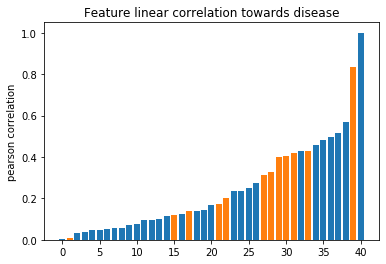

In [31]:
corr = data_clv.corr()['disease'].abs().sort_values().dropna()

F = pd.DataFrame(corr)
F.columns=(["corr"])
F["no"] = range(len(F.index))
F["13"] = [s in thirteen for s in F.index]

plt.bar(range(0,len(corr)),corr * ~F["13"])
plt.bar(range(0,len(corr)),corr * F["13"])
#plt.hlines(0.2,0,len(corr), color='r')
plt.title("Feature linear correlation towards disease")
plt.ylabel("pearson correlation")


Text(0, 0.5, 'pearson correlation')

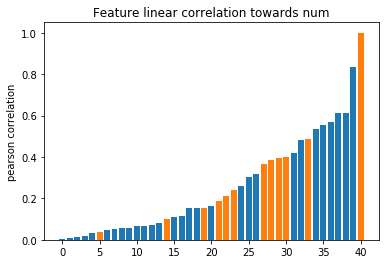

In [32]:
corr = data_clv.corr()['num'].abs().sort_values().dropna()

F = pd.DataFrame(corr)
F.columns=(["corr"])
F["no"] = range(len(F.index))
F["13"] = [s in thirteen for s in F.index]

plt.bar(range(0,len(corr)),corr * ~F["13"])
plt.bar(range(0,len(corr)),corr * F["13"])
#plt.hlines(0.2,0,len(corr), color='r')
plt.title("Feature linear correlation towards num")
plt.ylabel("pearson correlation")


In [33]:
TP,TN,FN,FP = 18,20,4,5

In [35]:
TP/(TP+FN), TN/(TN+FP)

(0.8181818181818182, 0.8)